In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)


('2017-08-23',)


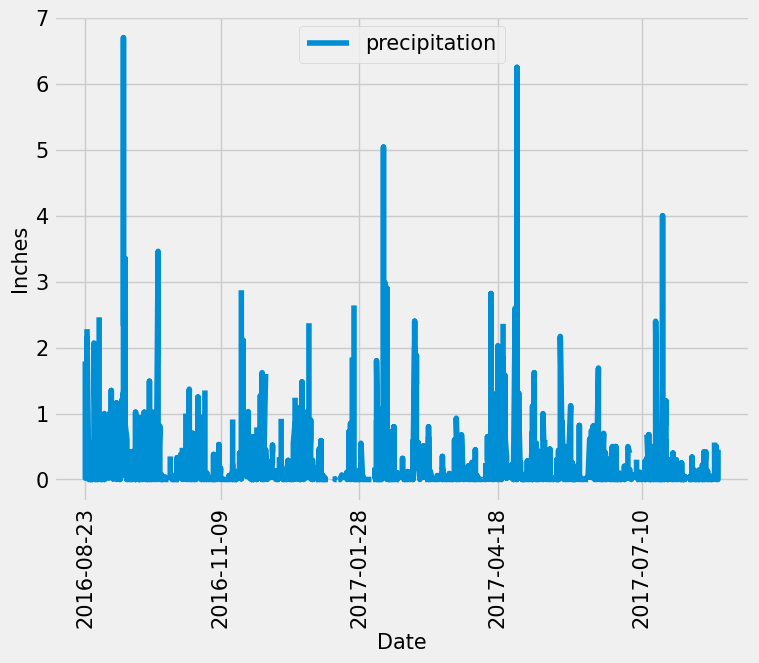

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    
# Calculate the date one year from the last date in data set.
query_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
oneyear_priordate = query_date - dt.timedelta(days=365)
#print(oneyear_priordate)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
oneyear_df = pd.DataFrame(prcp_data, columns = ['date', 'prcp'])
oneyear_df = oneyear_df.set_index("date")
#oneyear_df.head()

# Sort the dataframe by date
sorted_oneyear_df = oneyear_df.sort_values(by = "date")
#sorted_oneyear_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 6))
plt.plot(sorted_oneyear_df.index, sorted_oneyear_df['prcp'])
plt.legend(['precipitation'], loc="upper center",fontsize=15)
xloc = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(xloc, rotation='vertical',fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.yticks(size=15)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_oneyear_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.station)).scalar()

stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Station.station, func.count(Station.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).order_by(func.count(Station.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.station == 'USC00519281').scalar()

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.station == 'USC00519281').scalar()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.station == 'USC00519281').scalar()

print([(lowest_temp, highest_temp, avg_temp)])

[(54.0, 85.0, 71.66378066378067)]


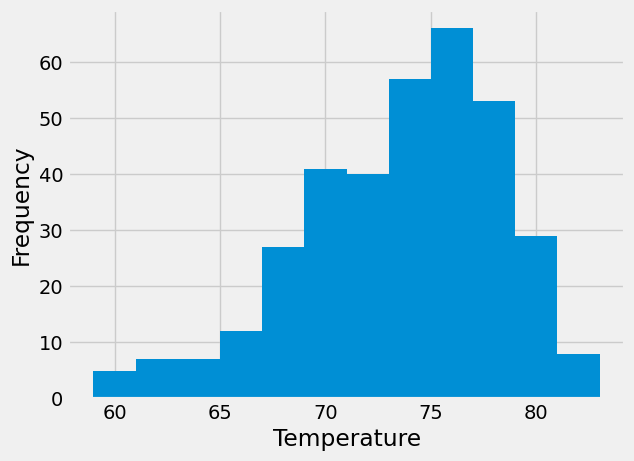

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.tobs).\
    filter(Measurement.date>='2016-08-23').\
    filter(Station.station == Measurement.station).\
    filter(Station.station == 'USC00519281').all()

observation = [t[0] for t in temp_observation]

fig1, ax1 = plt.subplots()
plt.hist(observation, 12, label = 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()